## Ensemble Model: Stacking

In [146]:
# Import necessary libraries
import pickle
import matplotlib.pyplot as plt

from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

### Data Preparation

In [147]:
df = pickle.load(open('../common/filtered_df.p', 'rb'))
df = df.iloc[:100] # For testing purposes
feature = 'cpu_usage'
# Split data into train and test sets 80:20
train_size = int(len(df) * 0.8)
train_cpu, test_cpu = df[feature].iloc[:train_size], df[feature].iloc[train_size:]

### Models Creation Functions & Utilities

In [148]:
def auto_select_arima(X):
    model = auto_arima(X, seasonal=False, trace=True, error_action="ignore", suppress_warnings=True, stepwise=True)
    return model

In [149]:
def train_arima(series, order=(1,1,1)):
    """
    Train an ARIMA model on a given time series.
    
    Parameters:
    - series: Pandas Series object representing the time series data.
    - order: A tuple representing the (p,d,q) parameters for ARIMA.
    
    Returns:
    - model_fit: The trained ARIMA model.
    """
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit

### Models Creation & Prediction

In [150]:
# cpu_auto_arima = auto_select_arima(train_cpu)
# print(cpu_auto_arima.summary())

In [151]:
cpu_arima_model = train_arima(train_cpu, order=(5, 0, 0))

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5S will be used.
  self._init_dates(dates, freq)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5S will be used.
  self._init_dates(dates, freq)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5S will be used.
  self._init_dates(dates, freq)


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [152]:
### ARIMA - CPU Usage
cpu_arima_forecast = cpu_arima_model.forecast(steps=len(test_cpu))

### Visualization

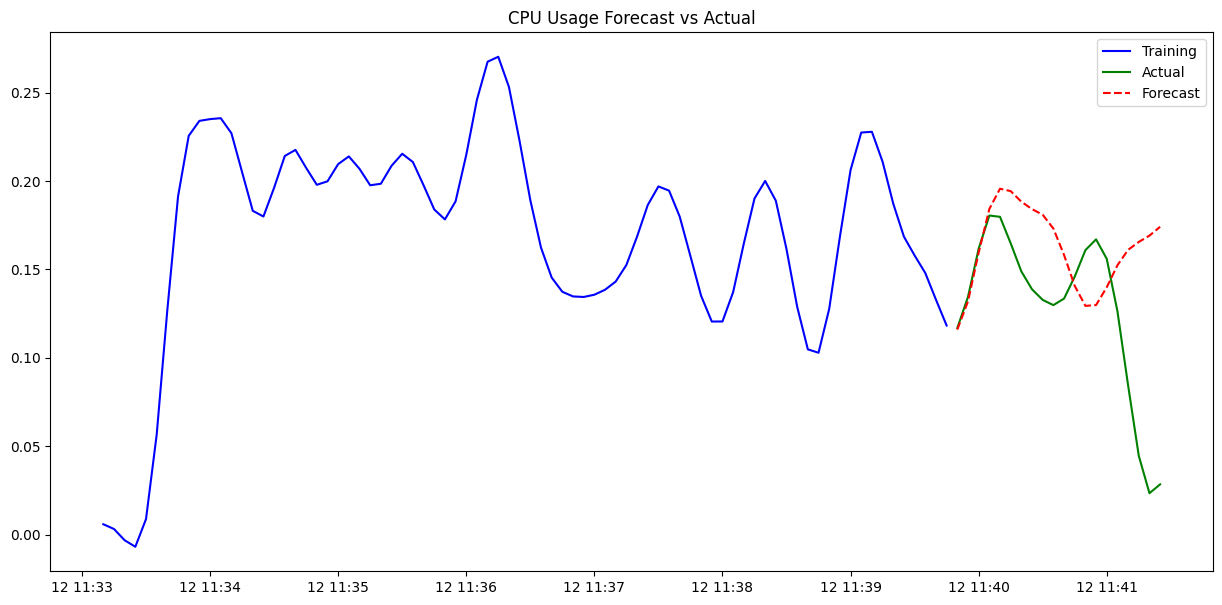

In [153]:
### ARIMA - CPU Usage

plt.figure(figsize=(15,7))

# Plotting training data
plt.plot(train_cpu.index, train_cpu, label='Training', color='blue')

# Plotting actual test data
plt.plot(test_cpu.index, test_cpu, label='Actual', color='green')

# Plotting forecast
plt.plot(test_cpu.index, cpu_arima_forecast, label='Forecast', color='red', linestyle='--')

plt.title('CPU Usage Forecast vs Actual')
plt.legend()
plt.show()